In [1]:
import geopandas as gpd
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import modin.pandas as pd
import numpy as np
import shapely
from modin.config import ProgressBar
from tqdm.auto import tqdm

ProgressBar.enable()

In [2]:
tweets = pd.read_parquet("tweets-tok.parquet")
tokens = pd.read_parquet("wforms-bat.parquet")

stats = [
    [
        tweets["tokens"].map(len).sum(),
        "total",
    ],
    [
        tweets.explode("tokens")["tokens"].isin(tokens[~tokens["tt_att"]].index).sum(),
        "prefiltered",
    ],
    [
        tokens.shape[0],
        "unique",
    ],
    [
        (~tokens["tt_att"]).sum(),
        "unique prefiltered",
    ],
]

print("Tokens statistics:")
for row in stats:
    print("{: >8} {}".format(*row))

del stats

To remove this warning, run the following python code before doing dataframe operations:

    import ray
    ray.init()

2023-07-28 17:10:43,239	INFO worker.py:1636 -- Started a local Ray instance.


Estimated completion of line 1:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 2:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 6:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 18:   0%           Elapsed time: 00:00, estimated remaining time: ?

Tokens statistics:
71458267 total
 6538326 prefiltered
  925843 unique
  745121 unique prefiltered


In [3]:
annos = pd.read_parquet("wforms-ann.parquet")
pars = annos.join(pd.read_parquet("wforms-bat.parquet"), how="left").join(
    pd.read_parquet(
        "wforms-occ.parquet", columns=["fst", "lst", "top", "cvx", "rho", "tot"]
    ),
    how="left",
)

Estimated completion of line 1:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 2:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 4:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 5:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 13:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 19:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 27:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 33:   0%           Elapsed time: 00:00, estimated remaining time: ?

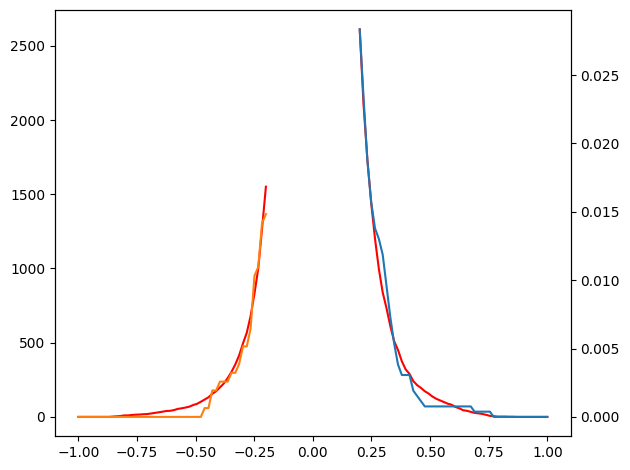

In [4]:
rho_thresholdsp = pd.Series(np.linspace(0.2, 1, 50))
rho_thresholdsn = pd.Series(np.linspace(-1, -0.2, 50))

testp = pars[pars["fst_batch"] & (pars["rho"] > 0.2)]
testn = pars[pars["fst_batch"] & (pars["rho"] < -0.2)]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    rho_thresholdsp,
    rho_thresholdsp.apply(lambda t: (testp["rho"] >= t).sum()),
    color="red",
)

ax2.plot(
    rho_thresholdsp,
    rho_thresholdsp.apply(
        lambda t: ((testp["rho"] >= t) & testp["status"].eq(1)).mean()
    ),  # /rho_thresholdsp.apply(lambda t: (testp["rho"] >= t).sum()),
)


ax1.plot(
    rho_thresholdsn,
    rho_thresholdsn.apply(lambda t: (testn["rho"] <= t).sum()),
    color="red",
)

ax2.plot(
    rho_thresholdsn,
    rho_thresholdsn.apply(
        lambda t: ((testn["rho"] <= t) & testn["status"].eq(1)).mean()
    ),  # /rho_thresholdsn.apply(lambda t: (testn["rho"] <= t).sum()),
)


fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 4:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 5:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 13:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 19:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 27:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 33:   0%           Elapsed time: 00:00, estimated remaining time: ?

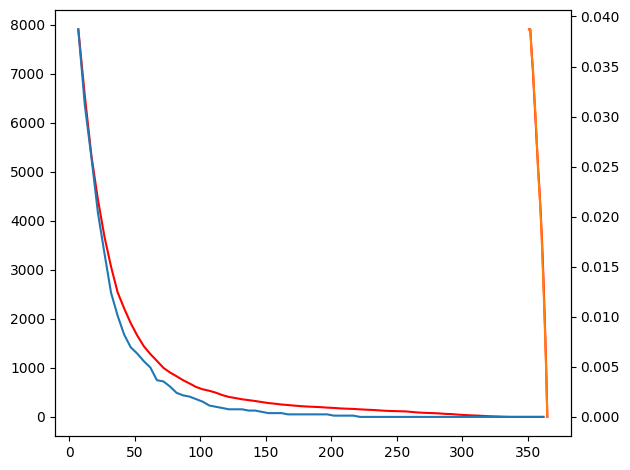

In [5]:
fst_thresholds = pd.Series(np.arange(7, 366, 5))
lst_thresholds = pd.Series(np.arange(351, 366))

testf = pars[pars["snd_batch"] & (pars["fst"] > 7)]
testl = pars[pars["snd_batch"] & (pars["lst"] > 351)]


fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    fst_thresholds,
    fst_thresholds.apply(lambda t: (testf["fst"] >= t).sum()),
    color="red",
)

ax2.plot(
    fst_thresholds,
    fst_thresholds.apply(
        lambda t: ((testf["fst"] >= t) & testf["status"].eq(1)).mean()
    ),  # /fst_thresholds.apply(lambda t: (testf["fst"] >= t).sum()),
)


ax1.plot(
    lst_thresholds,
    lst_thresholds.apply(lambda t: (testl["lst"] >= t).sum()),
    color="red",
)

ax2.plot(
    lst_thresholds,
    lst_thresholds.apply(
        lambda t: ((testl["lst"] >= t) & testl["status"].eq(1)).mean()
    ),  # /lst_thresholds.apply(lambda t: (testl["lst"] >= t).sum()),
)


fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 16:   0%           Elapsed time: 00:00, estimated remaining time: ?

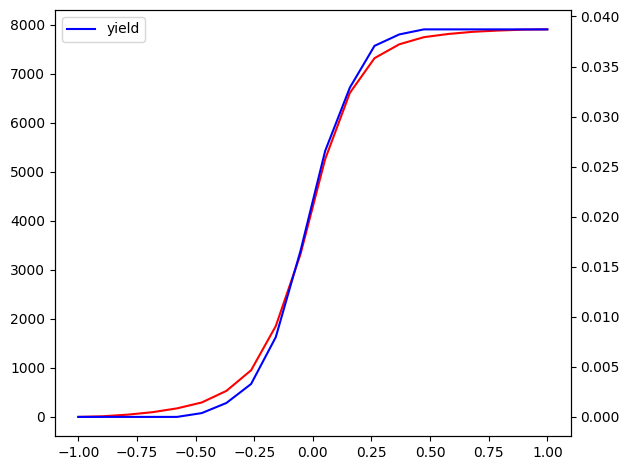

In [6]:
thresholds = pd.Series(np.linspace(-1, +1, 20))

test = pars[pars["snd_batch"] & ~pars["cvx"].isna()]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    thresholds,
    thresholds.apply(lambda t: (test["cvx"] <= t).sum()),
    color="red",
)

ax2.plot(
    thresholds,
    thresholds.apply(lambda t: ((test["cvx"] <= t) & test["status"].eq(1)).mean()),
    color="blue",
    label="yield",
)

plt.legend()

fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 16:   0%           Elapsed time: 00:00, estimated remaining time: ?

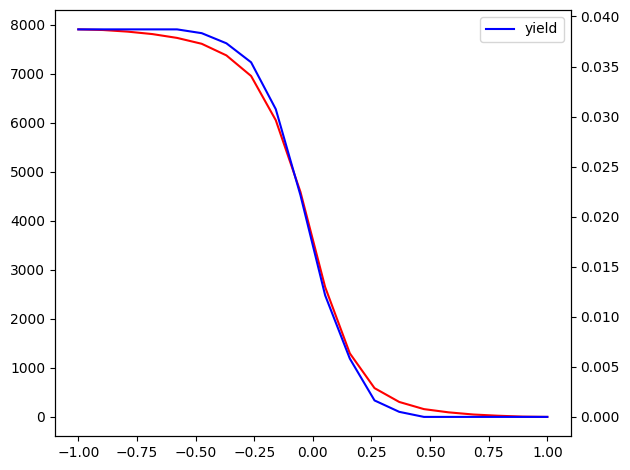

In [7]:
thresholds = pd.Series(np.linspace(-1, +1, 20))

test = pars[pars["snd_batch"] & ~pars["cvx"].isna()]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    thresholds,
    thresholds.apply(lambda t: (test["cvx"] >= t).sum()),
    color="red",
)

ax2.plot(
    thresholds,
    thresholds.apply(lambda t: ((test["cvx"] >= t) & test["status"].eq(1)).mean()),
    color="blue",
    label="yield",
)

plt.legend()

fig.tight_layout()
plt.show()

Distributing Dataframe:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 3:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 10:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 16:   0%           Elapsed time: 00:00, estimated remaining time: ?

Estimated completion of line 17:   0%           Elapsed time: 00:00, estimated remaining time: ?

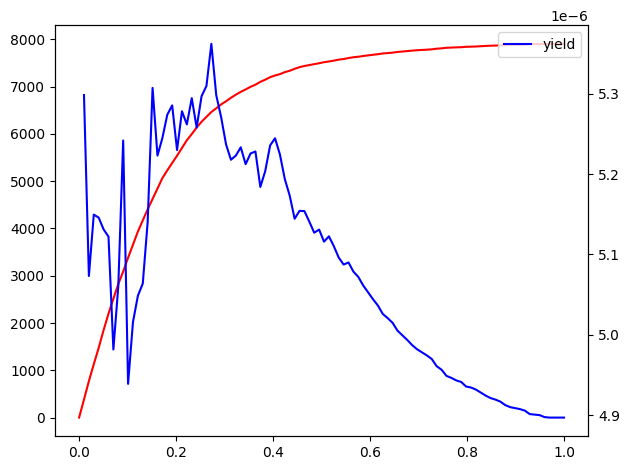

In [8]:
thresholds = pd.Series(np.linspace(0, +1, 100))

test = pars[pars["snd_batch"] & ~pars["cvx"].isna()]

fig, ax1 = plt.subplots()
ax2 = ax1.twinx()

ax1.plot(
    thresholds,
    thresholds.apply(lambda t: (abs(test["cvx"]) <= t).sum()),
    color="red",
)

ax2.plot(
    thresholds,
    thresholds.apply(lambda t: ((abs(test["cvx"]) <= t) & test["status"].eq(1)).mean())
    / thresholds.apply(lambda t: (abs(test["cvx"]) <= t).sum()),
    color="blue",
    label="yield",
)

plt.legend()

fig.tight_layout()
plt.show()